#### 0 Importing the packages


In [326]:
import pandas as pd
import numpy as np
import random as rnd

import seaborn as sns
import matplotlib.pyplot as plt
sns.set()
%matplotlib inline

from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

from sklearn.preprocessing import MinMaxScaler


#### 1 Exploratory analysis

In [168]:
trainData = pd.read_csv('../data/rawData/train.csv')
testData = pd.read_csv('../data/rawData/test.csv')

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

In [169]:
trainData.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [170]:
testData.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


There is some information that we should know about our data:

- **PassengerId**: this columns means nothing for the analysis so its better to drop it out from it
- **Pclass**: is a categorical value that determines the "social class" of the passenger.

       - 1: low class
       - 2: middle class
       - 3: upper class

- **Name**: this column have many symbols that can make our analysis a bit difficult, and also is a column which maybe is better to remove from the dataset because the information isn't relevant for us
- **Sex**: is a binary categorical value. It's better to change *Man* = 1, *female* = 0
- **Age**: is a numerical float value
- **SibSp**: it's a binary categorical value for siblings
- **Parch**: it's a binary categorical value for parents and sons
- **Ticket**: it's the ticket number and it's not relevant
- **Fare**: how much the ticket costs
- **Cabin**: the cabin number. This value have many NaN
- **Embarked**: is the place in which the passenger arrived

In [171]:
trainData.describe(include='all')

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,891.000000,891.000000,891.000000,891,891,714.000000,891.000000,891.000000,891,891.000000,204,889
unique,NaN,NaN,NaN,891,2,NaN,NaN,NaN,681,NaN,147,3
top,NaN,NaN,NaN,"Braund, Mr. Owen Harris",male,NaN,NaN,NaN,347082,NaN,B96 B98,S
freq,NaN,NaN,NaN,1,577,NaN,NaN,NaN,7,NaN,4,644
mean,446.000000,0.383838,2.308642,NaN,NaN,29.699118,0.523008,0.381594,NaN,32.204208,NaN,NaN
std,257.353842,0.486592,0.836071,NaN,NaN,14.526497,1.102743,0.806057,NaN,49.693429,NaN,NaN
min,1.000000,0.000000,1.000000,NaN,NaN,0.420000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,223.500000,0.000000,2.000000,NaN,NaN,20.125000,0.000000,0.000000,NaN,7.910400,NaN,NaN
50%,446.000000,0.000000,3.000000,NaN,NaN,28.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,668.500000,1.000000,3.000000,NaN,NaN,38.000000,1.000000,0.000000,NaN,31.000000,NaN,NaN


In [172]:
testData.describe(include='all')

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
count,418.000000,418.000000,418,418,332.000000,418.000000,418.000000,418,417.000000,91,418
unique,NaN,NaN,418,2,NaN,NaN,NaN,363,NaN,76,3
top,NaN,NaN,"Kelly, Mr. James",male,NaN,NaN,NaN,PC 17608,NaN,B57 B59 B63 B66,S
freq,NaN,NaN,1,266,NaN,NaN,NaN,5,NaN,3,270
mean,1100.500000,2.265550,NaN,NaN,30.272590,0.447368,0.392344,NaN,35.627188,NaN,NaN
std,120.810458,0.841838,NaN,NaN,14.181209,0.896760,0.981429,NaN,55.907576,NaN,NaN
min,892.000000,1.000000,NaN,NaN,0.170000,0.000000,0.000000,NaN,0.000000,NaN,NaN
25%,996.250000,1.000000,NaN,NaN,21.000000,0.000000,0.000000,NaN,7.895800,NaN,NaN
50%,1100.500000,3.000000,NaN,NaN,27.000000,0.000000,0.000000,NaN,14.454200,NaN,NaN
75%,1204.750000,3.000000,NaN,NaN,39.000000,1.000000,0.000000,NaN,31.500000,NaN,NaN


In [173]:
trainData.isna().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [174]:
testData.isna().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

As we can see, for both the train data and the test data, the age and cabin rows are those that have the most NaN values. Age is a value that it's important to analyze, but the cabin isn't. it will be better if we dropped out it from the dataset

In [175]:
trainData.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [176]:
testData.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


In [177]:
trainData.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Now we are going to drop all those features that are non relevant for our analysis, which are *Name*, *PassengerId*, *Ticket*, *Cabin* and we are going to do a copy of the datasets
 

In [178]:
featureDrop = ['PassengerId', 'Name', 'Ticket', 'Cabin']
trainData1 = trainData.copy()
testData1 = testData.copy()
trainDrop = trainData1.drop(featureDrop, axis=1)
testDrop = testData1.drop(featureDrop, axis=1)
print(trainDrop.shape)
print(testDrop.shape)

(891, 8)
(418, 7)


In [179]:
trainDrop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [180]:
testDrop.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


In [181]:
classSurv = trainDrop[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean().sort_values(by='Survived', ascending=False)
classSurv


,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


The first class had more survivors (this information doesn't impress me, of course)

In [182]:
sexSurv = trainDrop[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sexSurv

,Sex,Survived
0,female,0.742038
1,male,0.188908


This also isn't impressive because it's known that women and child were the ones that was permitted to aboard the lifeboats

In [183]:
survivedAge = trainDrop[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by='Age', ascending=False)
survivedAge


,Age,Survived
87,80.00,1.000000
86,74.00,0.000000
85,71.00,0.000000
84,70.50,0.000000
83,70.00,0.000000
82,66.00,0.000000
81,65.00,0.000000
80,64.00,0.000000
79,63.00,1.000000
78,62.00,0.500000


A high percentage of infants survived. Maybe it's better if we do a better classification for the ages. If we check the National institute of health, the classification is:
- **Neonates**: <1 years
- **Children**: 1-12 years
- **Adolescents (teenagers)**: 13-17 years
- **Adults**: 18 - 64 years
- **Older Adults**: 65> years

In [190]:
survivedAgeGroups = survivedAge.copy()

ageGroups = [
    (survivedAgeGroups['Age']<1),
    ((survivedAgeGroups['Age']>=1) & (survivedAgeGroups['Age']<=12)),
    ((survivedAgeGroups['Age']>=13) & (survivedAgeGroups['Age']<=17)),
    ((survivedAgeGroups['Age']>=18) & (survivedAgeGroups['Age']<=64)),
    (survivedAgeGroups['Age']>=65)
]

ageGroupsLabels = ['Neonates', 'Children', 'Teenagers', 'Adults', 'Old Adults']
survivedAgeGroups['Age Group'] = np.select(ageGroups, ageGroupsLabels)
survivedAgeGroups.groupby(['Age Group'], as_index=False)['Survived'].mean()

survivedAgeGroups

,Age,Survived,Age Group
87,80.00,1.000000,Old Adults
86,74.00,0.000000,Old Adults
85,71.00,0.000000,Old Adults
84,70.50,0.000000,Old Adults
83,70.00,0.000000,Old Adults
82,66.00,0.000000,Old Adults
81,65.00,0.000000,Old Adults
80,64.00,0.000000,Adults
79,63.00,1.000000,Adults
78,62.00,0.500000,Adults


In [200]:

survival_means = survivedAgeGroups[['Age Group', 'Survived']].groupby('Age Group').mean()
survival_means

,Survived
Age Group,
Adults,0.326072
Children,0.545635
Neonates,1.000000
Old Adults,0.142857
Teenagers,0.519080


So, all the neonates survived, children and teenagers has more than 40% probability to survive. But for now, we should stop this analysis because as we remember there are many age values which appear as NaN so it's better to fix them. For now, we are going to analyze just a little all the information which doesn't have missing information.

In [186]:
sibSurv = trainDrop[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sibSurv

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [187]:
parchSurv = trainDrop[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)
parchSurv

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


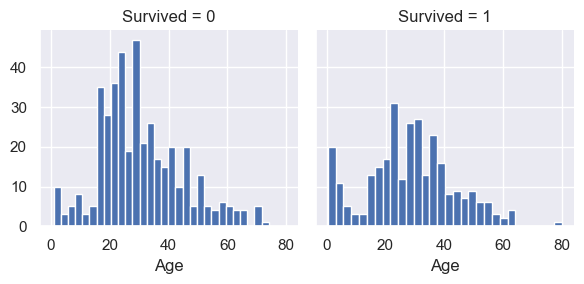

In [201]:
ageSurvGraph = sns.FacetGrid(trainDrop, col='Survived')
ageSurvGraph.map(plt.hist, 'Age', bins=30)

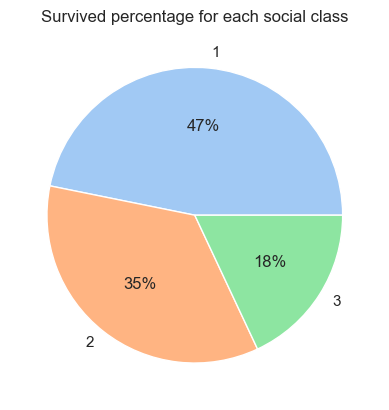

In [206]:
survivedDataClass = classSurv['Survived']
labelSurvClass = classSurv['Pclass']

colors = sns.color_palette('pastel')[0:3]

plt.pie(survivedDataClass, labels = labelSurvClass, colors = colors, autopct='%.0f%%')
plt.title('Survived percentage for each social class')
plt.show()

For now, its better to do a fix in our original data before we go down into a deeper analysis  

### 2 Cleaning the data

We already dropped some features that will give us some pain to classify correctly and that it's possible that cannot give us "important" information for our analysis


In [207]:
trainDrop.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [208]:
testDrop.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,male,34.5,0,0,7.8292,Q
1,3,female,47.0,1,0,7.0000,S
2,2,male,62.0,0,0,9.6875,Q
3,3,male,27.0,0,0,8.6625,S
4,3,female,22.0,1,1,12.2875,S


First, we are going to change the sex feature as we said before: male = 1, female = 0

In [261]:
trainGender = trainDrop.copy()
testGender = testDrop.copy()

In [262]:
trainGender['Sex'] = trainGender['Sex'].map({'male':1, 'female':0})
testGender['Sex'] = testGender['Sex'].map({'male':1, 'female':0})


In [263]:
trainGender.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [264]:
testGender.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [265]:
trainGender.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,889
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,644
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,NaN


In [266]:
trainGender.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  889 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


This feature have so many missing values and we need to fill them. We can consider fill them based on the mean or the median. The mean imputation have many disadvantages so it's better to use another one. We can choose for example another subject with similar variables. Also, we can choose a iterative imputation method.
But first, we need to fill the embarked missing attributes which are only two.



In [267]:
embarkedMostFreq = trainGender.Embarked.dropna().mode()[0]
embarkedMostFreq

trainEmbarked = trainGender.copy()
testEmbarked = testGender.copy()

trainEmbarked['Embarked'] = trainEmbarked['Embarked'].fillna(embarkedMostFreq)
testEmbarked['Embarked'] = testEmbarked['Embarked'].fillna(embarkedMostFreq)

In [268]:
trainEmbarked.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [269]:
testEmbarked.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,Q
1,3,0,47.0,1,0,7.0000,S
2,2,1,62.0,0,0,9.6875,Q
3,3,1,27.0,0,0,8.6625,S
4,3,0,22.0,1,1,12.2875,S


In [270]:
trainEmbarked.describe(include='all')

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000,891
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,3
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,S
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,646
mean,0.383838,2.308642,0.647587,29.699118,0.523008,0.381594,32.204208,NaN
std,0.486592,0.836071,0.477990,14.526497,1.102743,0.806057,49.693429,NaN
min,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,NaN
25%,0.000000,2.000000,0.000000,20.125000,0.000000,0.000000,7.910400,NaN
50%,0.000000,3.000000,1.000000,28.000000,0.000000,0.000000,14.454200,NaN
75%,1.000000,3.000000,1.000000,38.000000,1.000000,0.000000,31.000000,NaN


In [271]:
trainEmbarked.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    int64  
 3   Age       714 non-null    float64
 4   SibSp     891 non-null    int64  
 5   Parch     891 non-null    int64  
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    object 
dtypes: float64(2), int64(5), object(1)
memory usage: 55.8+ KB


Now we need to change the embarked values to numerical:




In [272]:
embarkedSurv = trainDrop[['Embarked', 'Survived']].groupby(['Embarked'], as_index=False).mean().sort_values(by='Survived', ascending=False)
embarkedSurv

,Embarked,Survived
0,C,0.553571
1,Q,0.389610
2,S,0.336957


We are going to change the values to:

- **C**: 0
- **Q**: 1
- **S**: 2

In [273]:
trainEmbarked['Embarked'] = trainEmbarked['Embarked'].map({'C':0, 'Q':1, 'S':2})
testEmbarked['Embarked'] = testEmbarked['Embarked'].map({'C':0, 'Q':1, 'S':2})


In [274]:
trainEmbarked.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,0
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


In [275]:
testEmbarked.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3,1,34.5,0,0,7.8292,1
1,3,0,47.0,1,0,7.0000,2
2,2,1,62.0,0,0,9.6875,1
3,3,1,27.0,0,0,8.6625,2
4,3,0,22.0,1,1,12.2875,2


Now we need to do the iterative imputation for the missing ages

In [277]:
trainImputation = trainEmbarked.copy()
testImputation = testEmbarked.copy()

imputer = IterativeImputer(random_state = 42)
imputedTrain = imputer.fit_transform(trainImputation)
imputedTest = imputer.fit_transform(testImputation)

trainImputationDf = pd.DataFrame(imputedTrain, columns = trainImputation.columns)
testImputationDf = pd.DataFrame(imputedTest, columns = testImputation.columns)


In [285]:
trainImputationDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,22.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,38.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,26.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,35.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,35.0,0.0,0.0,8.0500,2.0


In [283]:
testImputationDf.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,34.5,0.0,0.0,7.8292,1.0
1,3.0,0.0,47.0,1.0,0.0,7.0000,2.0
2,2.0,1.0,62.0,0.0,0.0,9.6875,1.0
3,3.0,1.0,27.0,0.0,0.0,8.6625,2.0
4,3.0,0.0,22.0,1.0,1.0,12.2875,2.0


In [280]:
trainImputationDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [281]:
trainImputationDf.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.266138,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.702664,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,-4.906068,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.570768,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.489302,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


As we can see, there are some values that are calculated to be less than 0 (which of course is not possible). So, those values is better to be changed to 0.

In [288]:
trainImputationDf.loc[trainImputationDf['Age'] <0, 'Age'] = 0
testImputationDf.loc[testImputationDf['Age'] <0, 'Age'] = 0


In [305]:
trainImputationDf.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,29.304593,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,13.613218,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,21.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,28.570768,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,36.489302,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,2.000000


In [304]:
testImputationDf.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,29.394822,0.447368,0.392344,35.565447,1.401914
std,0.841838,0.481622,12.957096,0.896760,0.981429,55.854766,0.854496
min,1.000000,0.000000,0.170000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,22.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,25.245439,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,36.375000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,76.000000,8.000000,9.000000,512.329200,2.000000


In [302]:
trainImputationDf.isnull().count()

Survived    891
Pclass      891
Sex         891
Age         891
SibSp       891
Parch       891
Fare        891
Embarked    891
dtype: int64

In [303]:
testImputationDf.isnull().count()

Pclass      418
Sex         418
Age         418
SibSp       418
Parch       418
Fare        418
Embarked    418
dtype: int64

Now that we have all the data cleaned, we are going to check again the values against the surviving rate as before. But, as there are many values of ages, it's better to change them and assigned them into the categorical values that we analyzed 

In [295]:
sexSurv = trainImputationDf[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean().sort_values(by='Survived', ascending=False)
sexSurv

,Sex,Survived
0,0.0,0.742038
1,1.0,0.188908


In [299]:
ageSurvived = trainImputationDf[['Age', 'Survived']].groupby(['Age'], as_index=False).mean().sort_values(by= 'Survived', ascending=False)
survivedAgeGroups = ageSurvived.copy()

ageGroups = [
    (survivedAgeGroups['Age']<1),
    ((survivedAgeGroups['Age']>=1) & (survivedAgeGroups['Age']<=12)),
    ((survivedAgeGroups['Age']>=13) & (survivedAgeGroups['Age']<=17)),
    ((survivedAgeGroups['Age']>=18) & (survivedAgeGroups['Age']<=64)),
    (survivedAgeGroups['Age']>=65)
]

ageGroupsLabels = ['Neonates', 'Children', 'Teenagers', 'Adults', 'Old Adults']
survivedAgeGroups['Age Group'] = np.select(ageGroups, ageGroupsLabels)
survivedAgeGroups.groupby(['Age Group'], as_index=False)['Survived'].mean()

survivedAgeGroups

survival_means = survivedAgeGroups[['Age Group', 'Survived']].groupby('Age Group').mean()
survival_means


,Survived
Age Group,
Adults,0.350079
Children,0.545635
Neonates,0.833333
Old Adults,0.142857
Teenagers,0.592873


In [312]:
trainAgeChanged = trainImputationDf.copy()
testAgeChanged = testImputationDf.copy()


trainAgeChanged.loc[trainAgeChanged['Age'] < 1, 'Age'] = 0
trainAgeChanged.loc[(trainAgeChanged['Age'] >=1) & (trainAgeChanged['Age'] <= 12), 'Age'] = 1
trainAgeChanged.loc[(trainAgeChanged['Age'] >12) & (trainAgeChanged['Age'] <= 17), 'Age'] = 2
trainAgeChanged.loc[(trainAgeChanged['Age'] >17) & (trainAgeChanged['Age'] <= 64), 'Age'] = 3
trainAgeChanged.loc[(trainAgeChanged['Age'] >64), 'Age'] = 4

testAgeChanged.loc[testAgeChanged['Age'] < 1, 'Age'] = 0
testAgeChanged.loc[(testAgeChanged['Age'] >=1) & (testAgeChanged['Age'] <= 12), 'Age'] = 1
testAgeChanged.loc[(testAgeChanged['Age'] >12) & (testAgeChanged['Age'] <= 17), 'Age'] = 2
testAgeChanged.loc[(testAgeChanged['Age'] >17) & (testAgeChanged['Age'] <= 64), 'Age'] = 3
testAgeChanged.loc[(testAgeChanged['Age'] >64), 'Age'] = 4

In [313]:
trainAgeChanged.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,3.0,1.0,3.0,1.0,0.0,7.2500,2.0
1,1.0,1.0,0.0,3.0,1.0,0.0,71.2833,0.0
2,1.0,3.0,0.0,3.0,0.0,0.0,7.9250,2.0
3,1.0,1.0,0.0,3.0,1.0,0.0,53.1000,2.0
4,0.0,3.0,1.0,3.0,0.0,0.0,8.0500,2.0


In [314]:
testAgeChanged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,3.0,0.0,0.0,7.8292,1.0
1,3.0,0.0,3.0,1.0,0.0,7.0000,2.0
2,2.0,1.0,3.0,0.0,0.0,9.6875,1.0
3,3.0,1.0,3.0,0.0,0.0,8.6625,2.0
4,3.0,0.0,3.0,1.0,1.0,12.2875,2.0


For now, the only feature that needs to be scale is the fare, because the max value is out of range (512 it's a big number). We are going to implement a standard scaler from scikit-learn for the whole data set

In [315]:
trainAgeChanged.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,0.647587,2.766554,0.523008,0.381594,32.204208,1.536476
std,0.486592,0.836071,0.477990,0.661496,1.102743,0.806057,49.693429,0.791503
min,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,0.000000,3.000000,0.000000,0.000000,7.910400,1.000000
50%,0.000000,3.000000,1.000000,3.000000,0.000000,0.000000,14.454200,2.000000
75%,1.000000,3.000000,1.000000,3.000000,1.000000,0.000000,31.000000,2.000000
max,1.000000,3.000000,1.000000,4.000000,8.000000,6.000000,512.329200,2.000000


In [316]:
trainAgeChanged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


In [317]:
testAgeChanged.describe()


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000,418.000000
mean,2.265550,0.636364,2.830144,0.447368,0.392344,35.565447,1.401914
std,0.841838,0.481622,0.564625,0.896760,0.981429,55.854766,0.854496
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.000000,0.000000,3.000000,0.000000,0.000000,7.895800,1.000000
50%,3.000000,1.000000,3.000000,0.000000,0.000000,14.454200,2.000000
75%,3.000000,1.000000,3.000000,1.000000,0.000000,31.471875,2.000000
max,3.000000,1.000000,4.000000,8.000000,9.000000,512.329200,2.000000


In [318]:
testAgeChanged.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,3.0,1.0,3.0,0.0,0.0,7.8292,1.0
1,3.0,0.0,3.0,1.0,0.0,7.0000,2.0
2,2.0,1.0,3.0,0.0,0.0,9.6875,1.0
3,3.0,1.0,3.0,0.0,0.0,8.6625,2.0
4,3.0,0.0,3.0,1.0,1.0,12.2875,2.0


In [319]:
testAgeChanged.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    418 non-null    float64
 1   Sex       418 non-null    float64
 2   Age       418 non-null    float64
 3   SibSp     418 non-null    float64
 4   Parch     418 non-null    float64
 5   Fare      418 non-null    float64
 6   Embarked  418 non-null    float64
dtypes: float64(7)
memory usage: 23.0 KB


In [341]:
scalerTrain = trainAgeChanged.copy()
scalerTest = testAgeChanged.copy()

In [342]:
columnNamesTrain = scalerTrain.columns
columnNamesTest = scalerTest.columns

In [343]:
scaler = MinMaxScaler()

scalerTrain[columnNamesTrain] = scaler.fit_transform(scalerTrain[columnNamesTrain])
scalerTest[columnNamesTest] = scaler.fit_transform(scalerTest[columnNamesTest])


In [345]:
scalerTrain.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0.0,1.0,1.0,0.75,0.125,0.0,0.014151,1.0
1,1.0,0.0,0.0,0.75,0.125,0.0,0.139136,0.0
2,1.0,1.0,0.0,0.75,0.000,0.0,0.015469,1.0
3,1.0,0.0,0.0,0.75,0.125,0.0,0.103644,1.0
4,0.0,1.0,1.0,0.75,0.000,0.0,0.015713,1.0


In [346]:
scalerTest.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,1.0,1.0,0.75,0.000,0.000000,0.015282,0.5
1,1.0,0.0,0.75,0.125,0.000000,0.013663,1.0
2,0.5,1.0,0.75,0.000,0.000000,0.018909,0.5
3,1.0,1.0,0.75,0.000,0.000000,0.016908,1.0
4,1.0,0.0,0.75,0.125,0.111111,0.023984,1.0


In [347]:
scalerTrain.describe()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,0.383838,0.654321,0.647587,0.691639,0.065376,0.063599,0.062858,0.768238
std,0.486592,0.418036,0.477990,0.165374,0.137843,0.134343,0.096995,0.395752
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.500000,0.000000,0.750000,0.000000,0.000000,0.015440,0.500000
50%,0.000000,1.000000,1.000000,0.750000,0.000000,0.000000,0.028213,1.000000
75%,1.000000,1.000000,1.000000,0.750000,0.125000,0.000000,0.060508,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [348]:
scalerTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    float64
 1   Pclass    891 non-null    float64
 2   Sex       891 non-null    float64
 3   Age       891 non-null    float64
 4   SibSp     891 non-null    float64
 5   Parch     891 non-null    float64
 6   Fare      891 non-null    float64
 7   Embarked  891 non-null    float64
dtypes: float64(8)
memory usage: 55.8 KB


### 3 Machine Learning Models